In [1]:
import QuantLib as ql
ql.Settings.instance().evaluationDate = ql.Date(3, ql.October, 2014)

In [2]:
helpers = [ql.SwapRateHelper(ql.QuoteHandle(ql.SimpleQuote(rate/100.0)), ql.Period(*tenor), ql.TARGET(), ql.Annual, ql.Unadjusted, ql.Thirty360(), ql.Euribor6M())\
           for tenor, rate in [((2, ql.Years), 0.201), ((3, ql.Years), 0.258), ((5, ql.Years), 0.464), ((10, ql.Years), 1.151), ((15, ql.Years), 1.588)]]

In [3]:
curve1 = ql.PiecewiseFlatForward(0, ql.TARGET(), helpers, ql.Actual360())

In [4]:
dates, rates = zip(*curve1.nodes())

In [5]:
curve1.nodes()

((Date(3,10,2014), 0.0019777694879293093),
 (Date(7,10,2016), 0.0019777694879293093),
 (Date(9,10,2017), 0.0036475517704509294),
 (Date(7,10,2019), 0.007660760701876805),
 (Date(7,10,2024), 0.018414773669420893),
 (Date(8,10,2029), 0.025311634328221498))

In [6]:
curve2 = ql.ForwardCurve(dates, rates, ql.Actual360())

In [7]:
print("{0} to {1}".format(curve1.referenceDate(), curve1.maxDate()))
print("{0} to {1}".format(curve2.referenceDate(), curve2.maxDate()))

October 3rd, 2014 to October 8th, 2029
October 3rd, 2014 to October 8th, 2029


In [8]:
print(curve1.zeroRate(5.0, ql.Continuous))
print(curve2.zeroRate(5.0, ql.Continuous))

0.452196 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding


In [9]:
print(curve1.zeroRate(ql.Date(7, ql.September, 2019), ql.Actual360(), ql.Continuous))
print(curve2.zeroRate(ql.Date(7, ql.September, 2019), ql.Actual360(), ql.Continuous))

0.452196 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

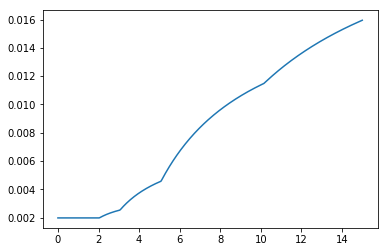

In [11]:
times = np.linspace(0.0, 15.0, 400)
rates = [curve1.zeroRate(t, ql.Continuous).rate() for t in times]
_, ax = plt.subplots()
ax.plot(times, rates)

In [25]:
ql.Settings.instance().evaluationDate = ql.Date(19, ql.September, 2014)

In [26]:
print("{0} to {1}".format(curve1.referenceDate(), curve1.maxDate()))
print("{0} to {1}".format(curve2.referenceDate(), curve2.maxDate()))

September 19th, 2014 to September 24th, 2029
October 3rd, 2014 to October 8th, 2029


In [27]:
print(curve1.zeroRate(5.0, ql.Continuous))
print(curve2.zeroRate(5.0, ql.Continuous))

0.452196 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding


In [28]:
print(curve1.zeroRate(ql.Date(7, ql.September, 2019), ql.Actual360(), ql.Continuous))
print(curve2.zeroRate(ql.Date(7, ql.September, 2019), ql.Actual360(), ql.Continuous))

0.454618 % Actual/360 continuous compounding
0.452196 % Actual/360 continuous compounding


In [29]:
def make_observer(i):
    def say():
        s = "Observer %d notified" % i
        print('-'*len(s))
        print(s)
        print('-'*len(s))
    return ql.Observer(say)
obs1 = make_observer(1)
obs2 = make_observer(2)

In [30]:
q1 = ql.SimpleQuote(1.0)
obs1.registerWith(q1)
q2 = ql.SimpleQuote(2.0)
obs2.registerWith(q2)
q3 = ql.SimpleQuote(3.0)
obs1.registerWith(q3)
obs2.registerWith(q3)

In [31]:
q1.setValue(1.5)

-------------------
Observer 1 notified
-------------------


In [32]:
q2.setValue(1.9)

-------------------
Observer 2 notified
-------------------


In [33]:
q3.setValue(3.1)

-------------------
Observer 2 notified
-------------------
-------------------
Observer 1 notified
-------------------


In [34]:
obs1.registerWith(curve1)
obs2.registerWith(curve2)

In [35]:
ql.Settings.instance().evaluationDate = ql.Date(23, ql.September, 2014)

-------------------
Observer 1 notified
-------------------
